## 2 Nearest Neighbor Classification on Real Data

### 2.1 Exploring the Data

In [15]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits ()
print(digits.keys())
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [16]:
print(data.dtype)
print(data.shape)

float64
(1797, 64)


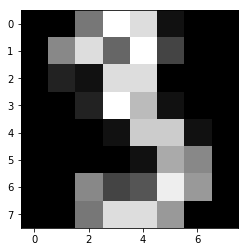

In [27]:
img = images[3]
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest")
plt.show()

In [5]:
from sklearn import model_selection

X_all = data
y_all = target

X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

### 2.2 Distance function computation using loops

In [6]:
def dist_loop(training, test):
    N = training.shape[0]
    M = test.shape[0]
    dists = np.empty((N,M), dtype=np.float32)
    
    for i in range(N):
        for j in range(M):
            dists[i,j] = np.linalg.norm(training[i] - test[j])
            
    return dists

In [18]:
%timeit dist_loop(X_train, X_test)

1 loop, best of 3: 4.36 s per loop


### 2.3 Distance function computation using vectorization

In [8]:
def dist_vec(training, test):
    return np.linalg.norm(training[:,np.newaxis,:] - test[np.newaxis,:,:], axis=2)

In [9]:
%timeit dist_vec(X_train, X_test)

1 loop, best of 3: 364 ms per loop


### 2.4 Implement the nearest neighbor classifier

In [75]:
from scipy import stats

def rule_k_nearest_neighbors(k, training, train_labels, test):
    M = test.shape[0]
    dists = dist_vec(training, test) #N*M
    k_smallest = np.argpartition(dists, k, axis=0)[:k,:] #k*M
    shape = k_smallest.shape
    labels = train_labels[k_smallest.flatten()].reshape(k,M)
    return stats.mode(labels, axis=0)[0]

In [95]:
def two_digit_error(i, j, k=1):
    pos_train = (y_train == i) | (y_train == j)
    X_train_ij = X_train[pos_train]
    y_train_ij = y_train[pos_train]
    pos_test = (y_test == i) | (y_test == j)
    X_test_ij = X_test[pos_test]
    y_test_ij = y_test[pos_test]

    return np.count_nonzero(rule_k_nearest_neighbors(k, X_train_ij, y_train_ij, X_test_ij) - y_test_ij) / y_test_ij.size

print(two_digit_error(1,3))
print(two_digit_error(1,7))
print(two_digit_error(3,9))

0.0
0.0
0.013888888888888888


### 2.5 Generalize to k-nearest neighbors 

In [99]:
ks = [1,3,5,9,17,33]
for k in ks:
    print("k = {:2d}, error = {:5.4f}".format(k, two_digit_error(3, 9, k)))

k =  1, error = 0.0139
k =  3, error = 0.0069
k =  5, error = 0.0069
k =  9, error = 0.0069
k = 17, error = 0.0069
k = 33, error = 0.0208


## 3 Cross-validation

In [81]:
a = np.arange(6).reshape(2,3)
print(a)
a[[[0,1],[0,2]]]
(a==1) | (a== 2)

[[0 1 2]
 [3 4 5]]


array([[False,  True,  True],
       [False, False, False]], dtype=bool)